<a href="https://colab.research.google.com/github/Gabrielhj17/Data-Science-Labs/blob/main/Copy_of_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
- Welcome to todays lab session where we will focus on linear regression. This lab will all be in Python, but the majority of the code is provided for you. Please try and trace through the code, and understand what each line does. Run the code, and experiment with what happens when you change things to improve your understanding.

- The easiest way to complete this session is to log into a Google account and save a copy to your google drive. Alternatively, you could save this document to your machine and open as a Jupyter notebook. This lab only requires 2 external libraries, [matplotlib](https://matplotlib.org/stable/tutorials/index.html) and [numpy](https://numpy.org/doc/stable/).

- When you see a function you don't understand/haven't seen before, please check the documentation to see what it's doing

**NB: The canvas also has a lecture companion notebook which generates the figures from the lectures. It's a better example of how you'd do linear regression in real life (as opposed to in a class where the goal is instead to learn how it works)**

In [1]:
# Import numpy for linear algebra support
import numpy as np
# Matplotlib is our main data plotting library
import matplotlib.pyplot as plt

# Set a training data range that's smaller than our test range, so we can demonstrate extrapolation
x_train_range = [-20, 20]
x_test_range = [-30, 30]
# What does the * notation do? Check what linspace does
x_test = np.linspace(*x_test_range, 100)
x_test = np.reshape(x_test, (-1, 1))


# Creating some test data
We can generate our own data that fulfills our model assumptions to play with.

Below is a function called create_data, which randomly generates a pair of linear model weights to synthesise some data. Note that the function takes a parameter called *noise_sigma*. This refers to the Gaussian/Normal distributed random noise that we expect to see in our model. It also takes n_samples, the number of data samples to generate. The final argument *random_seed* is used to seed the random number generator: if you set this to a number the function will return consistent results, if you keep it as None it changes each time. Check out the random number generator [documentation](https://numpy.org/doc/stable/reference/random/generator.html) and for the [standard_normal function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html)

1. Try running the code below a few times, and note how the resulting plot changes each time you run it. Why is the plot changing? What do you notice about the plot for different model weight values?

2. Try adjusting the value of sigma, what effect does this have on the plots?

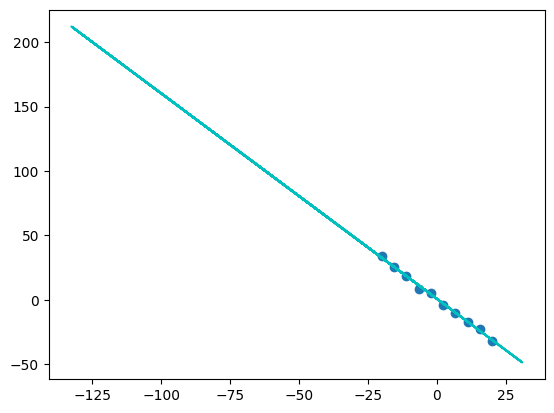

(0.7841299279263607, -1.5933287695167677)


In [10]:
# Let's start by defining a function some data that follows a linear assumption
# Note, if you change random seed to a number it will return consisten results
def create_data(noise_sigma=1.0, n_samples=10, random_seed=None):
  # Create a random number generator with the specified seed
  rng = np.random.default_rng(random_seed)

  # Sample some data at even intervals in x. Choose n_sample points
  x = np.linspace(*x_train_range, n_samples)
  x = np.reshape(x, (-1, 1))
  # Let's randomly generate some coefficient weights
  intercept = rng.standard_normal()
  linear_coeff = rng.standard_normal()

  # Regression defines a generative model of our observed target variables
  # So we can use the same model to generate our training data.
  y = x*linear_coeff + intercept
  # We need to remember to add our residual model noise. We sample random normally
  # distributed values and scale them by the standard deviation
  y += rng.standard_normal(y.shape) * noise_sigma

  # Let's store the noise free, ground truth function in the right range
  y_gt = x_test*linear_coeff + intercept

  return x, y, (intercept, linear_coeff), y_gt

# If we call this function it returns some x and y points as well as the real model weights
x, y, weights, y_gt = create_data()
# Show the ground truth function in cyan
plt.plot(x_test, y_gt, 'c-')
plt.scatter(x, y)
plt.show()

print(weights)


# Fitting a model to data
As we've seen in the lectures, one way of fitting a linear regression model (estimating the parameters) is to calculate the psuedo-inverse of X. Where the optimal parameters w* are given by: $$\mathbf{w}^* = (X^TX)^{-1}X^T\mathbf{y} = X^{+}\mathbf{y}$$, and $X^+$ is the psuedo-inverse ([np.pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)) of X. For simple regression problems like we have here, this is an effective and simple solution.

1. Read through the code below and see how this equates with the mathematics in the slides.

2. Run the code for different generated data samples (running create_data again). How can we measure how well the model is doing? Try running this code for larger/smaller values of sigma. How does this affect the result?

3. Try also adjusting the number of data samples. How does this affect the results?

4. What was the cost function that is being minimised by this model? Can you calculate the value of cost function for the solution below? hint: [np.square](https://numpy.org/doc/stable/reference/generated/numpy.square.html) and [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) might be helpful

5. How can we estimate $\sigma$ from the fitted model? hint: think what sigma represents and look at the function [np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) What do you notice about this with respect to the cost function? and why?

[[ 0.9542628 ]
 [-0.25883863]] (0.6911147367871492, -0.2840311053271719)


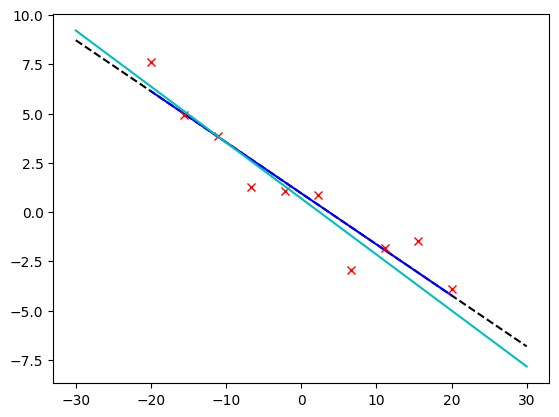

In [3]:
# augment our data to allow for a constant intercept
def augment_x(data):
  # We need to add a column of ones to x to describe the constant intecept
  augmented_data = np.concatenate([np.ones((data.shape[0],1)), data], axis=1)
  return augmented_data


def fit_linear_regression(_x, _y):
  _x = augment_x(_x)
  # Estimate the weights by multiplying the psuedo-inverse by y
  estimated_weights = np.matmul(np.linalg.pinv(_x), _y)
  return estimated_weights

# Produce our prediction for a given value of x for the fitted model weights
def f_hat(_x, _w):
  # Calculate our predicted points for each value of x
  y_hat = np.matmul(augment_x(_x), _w)
  return y_hat

estimated_weights = fit_linear_regression(x, y)

# Print the esimated weights and then the real weights
print(estimated_weights, weights)

# Calculate our predicted points for each value of x
y_hat = f_hat(x, estimated_weights)

# Plot the fitted function outside of the range with a black dotted line
plt.plot(x_test, f_hat(x_test, estimated_weights), 'k--')
# Plot the fitted function inside the training range with a blue line
plt.plot(x, y_hat, 'b-')
# Show the training points as red crosses
plt.plot(x, y, 'rx')
# Show the ground truth function in cyan
plt.plot(x_test, y_gt, 'c-')
plt.show()

# Increasing the complexity of the generated data
As we discussed in the lecture, we make the linear regression model more complex by augmenting the data.
1. Take a look at the new function below, there's one small change you need to make for it to generate data according to a quadratic, e.g. $y = w_0 + w_1x +w_2x^2$. Can you spot it?
2. Run the simple model fitting from before, how does it do on data that follows the more complex function?

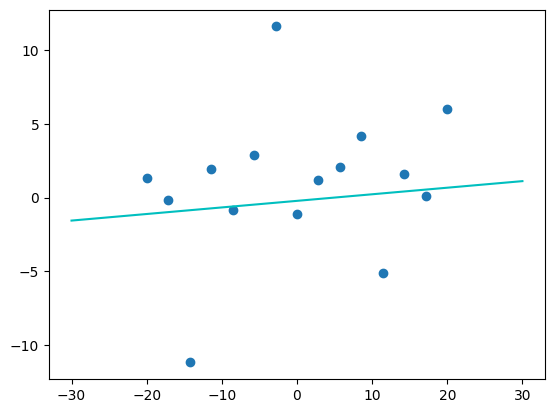

(-0.22511061405663116, 0.044549650312870524, 0.0)


In [4]:
# Note, if you change random seed to a number it will return consisten results
def create_more_complex_data(noise_sigma=1.0, n_samples=10, random_seed=None):
  # Create a random number generator with the specified seed
  rng = np.random.default_rng(random_seed)
  # Sample some data at even intervals in x
  x = np.linspace(*x_train_range, n_samples)
  x = np.reshape(x, (-1, 1))
  # Let's randomly generate some coefficient weights
  intercept = rng.standard_normal()
  linear_coeff = rng.standard_normal()
  quad_coeff = rng.standard_normal()*0.0

  # Regression defines a generative model of our observed target variables
  # So we can use the same model to generate our training data.
  y = np.square(x)*quad_coeff + x*linear_coeff + intercept
  # We need to remember to add our residual model noise. We sample random normally
  # distributed values and scale them by the standard deviation
  y += rng.standard_normal(y.shape) * noise_sigma

  # Let's store the noise free, ground truth function in the right range
  y_gt = np.square(x_test)*quad_coeff + x_test*linear_coeff + intercept

  return x, y, (intercept, linear_coeff, quad_coeff), y_gt

x, y, weights, y_gt = create_more_complex_data(4.0, 15)
plt.scatter(x, y)
# Show the ground truth function in cyan
plt.plot(x_test, y_gt, 'c-')
plt.show()

print(weights)

[[0.96967895]
 [0.09251892]] (-0.22511061405663116, 0.044549650312870524, 0.0)


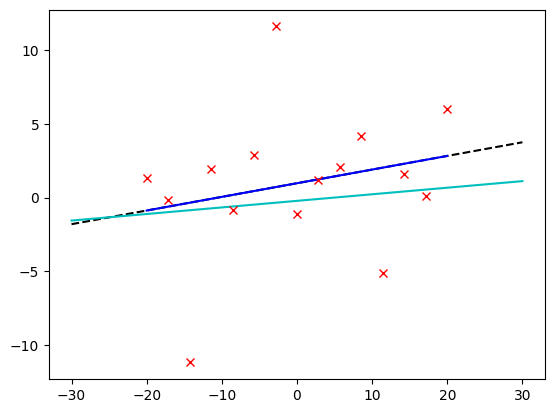

In [5]:
estimated_weights = fit_linear_regression(x, y)

# Print the esimated weights and then the real weights
print(estimated_weights, weights)

# Calculate our predicted points for each value of x
y_hat = f_hat(x, estimated_weights)

# Plot the fitted function outside of the range with a black dotted line
plt.plot(x_test, f_hat(x_test, estimated_weights), 'k--')
# Show the ground truth function in cyan
plt.plot(x_test, y_gt, 'c-')
plt.plot(x, y_hat, 'b-')
plt.plot(x, y, 'rx')
plt.show()

# Increasing the complexity of the model
Now let's make the model accordingly more complex

1. Modify the function transform_data, which is nested in augment_x_v2 to make the model fit a quadratic to the data. The default return of np.zeros_like() doesn't have any effect on the model fitting, why?

2. How can we modify this code to fit a 3rd order polynomial, or an nth order polynomial. Hint: add more elements to the np.concatenate list and look at [np.power](https://numpy.org/doc/stable/reference/generated/numpy.power.html).

3. How does the more complex model react to noisier data/fewer samples? Is it more of less affected?


[[0.96967895]
 [0.09251892]
 [0.        ]] (-0.22511061405663116, 0.044549650312870524, 0.0)
21.988464065907127 4.689185863868815


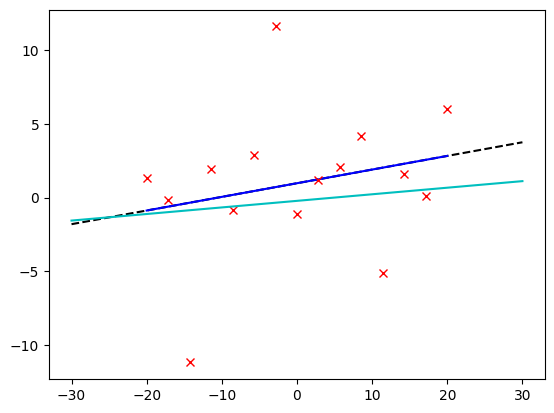

In [6]:
# augment our data to allow for a constant intercept and other functions
# of the data to be used.
def augment_x_v2(data):
  def transform_data(data):
    return np.zeros_like(data)
  # We need to add a column of ones to x to describe the constant intecept
  augmented_data = np.concatenate([np.ones((data.shape[0],1)), data, transform_data(data)], axis=1)
  return augmented_data


def fit_linear_regression_v2(_x, _y):
  _x = augment_x_v2(_x)
  estimated_weights = np.matmul(np.linalg.pinv(_x), _y)
  return estimated_weights

def f_hat_v2(_x, _w):
  # Calculate our predicted points for each value of x
  y_hat = np.matmul(augment_x_v2(_x), _w)
  return y_hat

estimated_weights = fit_linear_regression_v2(x, y)


# Print the esimated weights and then the real weights
print(estimated_weights, weights)

y_hat = f_hat_v2(x, estimated_weights)

cost = np.mean(np.square(y - y_hat))
std = np.std(y_hat-y)
print(cost, std)
# Plot the fitted function outside of the range with a black dotted line
plt.plot(x_test, f_hat_v2(x_test, estimated_weights), 'k--')
plt.plot(x, y_hat, 'b-')
plt.plot(x, y, 'rx')
plt.plot(x_test, y_gt, 'c-')
plt.show()

# Calculating the error on some test points
In the real world, we'll never know the true underlying function! Instead we'll have some test data that we've held out, which we hope was generated using the same process as the training data.

Here, let's calculate the test data, using the same generating model but randomly sampled across the full range and with different noise realisations.
1. Calculate the test error for the linear model trained on the more complex data.
2. Calculate the test error for the more complex models trained on the complex data. Which model complexity works best? How is this model choice modified when sigma/n_samples increases?

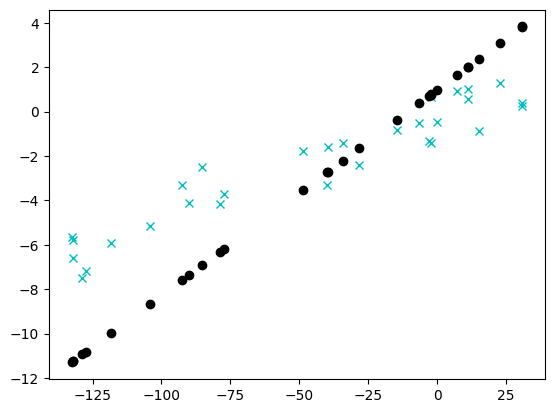

In [7]:
# Note, if you change random seed to a number it will return consistent results
def create_test_data(weights, noise_sigma=1.0, random_seed=None):
  # Create a random number generator with the specified seed
  rng = np.random.default_rng(random_seed)

  # Sample some data at random intervals in the test data ramge
  x = rng.standard_normal((30,1))*(x_test_range[1]-x_test_range[0]) + x_test_range[0]

  # Regression defines a generative model of our observed target variables
  # So we can use the same model to generate our training data.
  y = np.square(x)*weights[2] + x*weights[1] + weights[0]
  # We need to remember to add our residual model noise. We sample random normally
  # distributed values and scale them by the standard deviation
  y += rng.standard_normal(y.shape) * noise_sigma

  return x, y

x_test, y_test = create_test_data(weights, 1.0)

# Plot the test points
plt.plot(x_test, y_test, 'cx')
# Plot the predicted location of the test points
plt.plot(x_test, f_hat_v2(x_test, estimated_weights), 'ko')
plt.show()